In [1]:
from utils.data_generation import *
import os
import numpy as np
import pickle

### Load existing pedestrian data

In [2]:
full_clip = pickle.load(open('data/trajectories/full_clip.pkl', 'rb'))
peds = pickle.load(open('data/trajectories/peds.pkl', 'rb')) #list of UnitObject return from YOLO

In [3]:
#transform UnitObject to list of bbox's centroid, and remove any noise from data
tracked_data = []
for ped in peds:
    tracked_data.append(get_tracked(ped))
tracked_data = [item for sublist in tracked_data for item in sublist]
tracked_data = [i for i in tracked_data if len(i) > 2]

/Users/ntemiyasathit/Documents/AutonomousDriving/Detect-and-Track/utils/data_generation.py:57: RuntimeWarning: overflow encountered in int_scalars
  points = [((p[0] + p[2]) / 2, (p[1] + p[3]) / 2) for p in points]


In [4]:
tracked_data[0] #example

[(196.5, 1190.5),
 (196.5, 1190.5),
 (196.0, 1190.5),
 (196.0, 1190.5),
 (197.0, 1190.0),
 (197.0, 1190.0),
 (200.5, 1192.5),
 (200.5, 1192.5),
 (199.5, 1192.0),
 (199.5, 1192.0),
 (197.0, 1192.5),
 (197.5, 1192.5)]

In [5]:
#time_warp all trajectories to the same length
tracked_data = [normalized_length(t) for t in tracked_data]
#transform img coord to ped coord
tracked_data = [transform_coord(t) for t in tracked_data]

In [6]:
tracked_data[0]

[[0, 0], [-0.5, 0.0], [0.5, -0.5], [4.0, 2.0], [3.0, 1.5]]

### Train model

In [7]:
from tracking.hmm_tracker import HmmTracker
from sklearn.model_selection import train_test_split

train, test = train_test_split(tracked_data, test_size=0.2)

N_HIDDEN = 12
model = HmmTracker(N_HIDDEN)

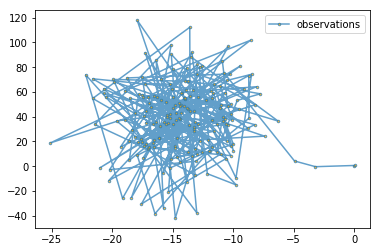

In [8]:
model.train(train)
model.plot_pattern()

In [16]:
model.evaluate(test)

Average error (in pixel):  11.462209457983164
Average percentage error:  1.4328767107076976
Classification accuracy (isCrosswalk):  0.8085106382978723


/Users/ntemiyasathit/Documents/AutonomousDriving/Detect-and-Track/utils/evalution.py:6: RuntimeWarning: invalid value encountered in double_scalars
  c = np.dot(u,v)/np.linalg.norm(u)/np.linalg.norm(v)
